In [40]:
# 导入库
import akshare as ak
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [ ]:
# akshare 版本  
print(ak.__version__)

In [37]:
# 获取白酒行业成分股数据

stocks = ak.stock_board_industry_cons_ths(symbol="白酒")
stocks.to_csv("白酒股票.csv")


In [58]:
# 获取板块股票逐年利润表
profit_y_dict = dict()

for i in tqdm(range(len(stocks))):
    market = 'sz'
    code = stocks.loc[i, "代码"]
    if (code.startswith('00') != True):
        market ='sh'
    symbol = "{}{}".format(market, code)
    profit_y = ak.stock_profit_sheet_by_yearly_em(symbol=symbol)
    # profit_y.to_csv("profit_{}.csv".format(code))

    profit_y_dict[code] = profit_y

# print(profit_y_dict)

100%|██████████| 20/20 [00:37<00:00,  1.89s/it]


In [75]:
# 获取板块股票归属母公司利润表

profit_dict = {}
for i in tqdm(range(len(stocks))):
    code = stocks.loc[i, "代码"]

    p = pd.Series(list(profit_y_dict[code]["PARENT_NETPROFIT"]), index=pd.to_datetime(profit_y_dict[code]["REPORT_DATE"]).dt.date)
    profit_dict[code] = p

df_parent_profit = pd.DataFrame(profit_dict)
# df_parent_profit.fillna(0, inplace=True)

100%|██████████| 20/20 [00:00<00:00, 1783.48it/s]


In [ ]:
df_parent_profit['000858']

In [63]:
df_parent_profit['000858'].to_csv("profit_000858.csv")

In [49]:
df_eps = pd.DataFrame()
eps_dict = {}

for i in tqdm(range(len(stocks))):
    market = 'sz'
    code = stocks.loc[i, "代码"]
    name = stocks.loc[i, "名称"]
    
    s1 = pd.Series(list(profit_y_dict[code]["BASIC_EPS"]), index=pd.to_datetime(profit_y_dict[code]["REPORT_DATE"]))
    eps_dict["{}-{}".format(code, name)] = s1

df_eps = pd.DataFrame(eps_dict)
df_eps.fillna(0, inplace=True)

100%|██████████| 20/20 [00:00<00:00, 3364.86it/s]


In [ ]:
df_eps.to_csv("eps.csv")

In [ ]:
df_eps.fillna(0, inplace=True)


In [ ]:
print(type(df_eps.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
df_eps['2010':]

,600696,600519,000568,002304,000858,600559,600779,603369,600702,000799,000995,002646,000596,603589,600809,603919,000860,600197,600199,603198
REPORT_DATE,,,,,,,,,,,,,,,,,,,,
2010-12-31,0.017,4.87,1.580,2.4500,1.158,0.30,0.4800,0.0000,0.2267,0.2621,-0.33,0.3791,1.34,0.00,1.1420,0.00,0.6051,0.3000,0.32,0.00
2011-12-31,0.060,8.44,2.080,3.7200,1.622,0.66,0.6560,1.1848,0.5787,0.6280,0.03,0.5426,1.17,0.73,0.9015,0.00,0.6997,0.4700,0.66,0.62
2012-12-31,0.071,12.82,3.140,5.7000,2.617,0.80,0.6913,1.5037,1.0965,1.5248,0.06,0.6699,1.44,0.84,1.5330,0.58,0.2869,0.5379,1.01,0.65
2013-12-31,0.026,13.25,2.460,4.6300,2.100,0.47,-0.3100,1.5140,0.0349,-0.1100,-0.17,0.8297,1.24,0.74,1.1092,0.52,0.4507,0.6185,0.24,0.59
2014-12-31,0.210,12.22,0.630,2.9900,1.537,0.42,-0.8245,1.3566,0.0397,-0.3000,-0.22,0.7050,1.19,0.78,0.4109,0.59,0.7124,0.6079,0.16,0.68
2015-12-31,-0.300,12.34,1.050,3.5600,1.627,0.21,0.1801,0.5462,0.0211,0.2726,0.01,0.5134,1.42,1.06,0.6013,0.79,0.6594,0.6393,0.09,0.69
2016-12-31,-0.720,13.31,1.396,3.8700,1.787,0.25,0.4601,0.6041,0.2378,0.3342,-0.93,0.4803,1.65,1.31,0.6989,0.65,0.7231,0.6277,0.03,0.85
2017-12-31,0.050,21.56,1.798,4.3976,2.548,0.27,0.6867,0.7141,0.4257,0.5420,-0.67,-0.2093,2.28,1.86,1.0999,0.69,0.7683,0.8012,0.01,0.83
2018-12-31,0.060,28.02,2.380,5.3850,3.474,0.41,1.1861,0.9173,1.0219,0.6853,-0.54,0.2391,3.37,2.55,1.7405,0.71,1.0034,0.9703,0.18,0.97


In [ ]:
df_close

,600696,600519,000568,002304,000858,600559,600779,603369,600702,000799,000995,002646,000596,603589,600809,603919,000860,600197,600199,603198
日期,,,,,,,,,,,,,,,,,,,,
2016-01-22,48.81,1128.21,560.66,214.47,421.80,47.42,50.10,28.01,44.80,24.77,NaN,18.36,62.07,34.46,51.53,NaN,36.68,27.62,31.77,23.11
2016-01-25,43.89,1128.36,565.34,220.61,427.43,48.07,51.03,28.81,46.19,25.01,NaN,18.54,62.87,35.07,54.16,NaN,38.47,27.96,32.09,23.57
2016-01-26,39.47,1109.47,540.99,220.51,413.51,45.13,49.01,26.67,41.86,23.58,NaN,17.30,62.39,32.65,52.18,NaN,39.50,25.84,29.25,21.97
2016-01-27,35.48,1114.09,536.87,215.78,404.13,46.20,48.73,26.25,47.20,22.24,NaN,17.20,61.49,31.97,51.61,NaN,40.72,25.54,28.13,21.12
2016-01-28,36.17,1097.56,527.13,211.07,399.90,44.64,49.18,24.69,42.74,20.95,NaN,16.60,57.69,29.55,49.53,NaN,38.53,24.76,27.21,19.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-12,66.58,9332.54,4267.41,614.84,3029.85,130.22,323.02,125.43,547.23,267.04,28.67,17.15,544.99,67.23,1135.67,44.55,81.30,60.49,106.11,64.43
2022-12-13,67.83,9387.71,4330.15,622.17,3047.36,132.64,331.02,127.10,557.37,269.73,28.95,17.23,564.35,68.02,1141.07,44.41,86.20,60.57,109.51,67.20
2022-12-14,69.74,9492.58,4495.52,643.47,3119.45,135.78,347.90,131.58,569.47,279.35,29.54,17.57,574.61,70.64,1180.59,47.66,85.89,61.79,112.07,70.95


In [ ]:
df_eps['2010':].plot(kind='bar')

In [ ]:
print(df_eps.mean().sort_values(ascending=False))

In [ ]:
df_eps.sort_index(ascending=True).plot(kind="bar", colormap="cubehelix",legend=False)

In [ ]:
### 导出每股收益到csv
profiet_y = ak.stock_profit_sheet_by_yearly_em(symbol="sh603919")
print(profit_y["BASIC_EPS"][0:5])
profiet_y.to_csv("profit_603919.csv")

In [ ]:
df_stocks.sort_index(ascending=True).pct_change().plot(kind="bar", colormap="cubehelix")

In [ ]:
import datetime

trade_date_list= ak.tool_trade_date_hist_sina()
all_trade_date = pd.to_datetime(trade_date_list["trade_date"])
all_trade_date.index = all_trade_date
print(all_trade_date)

ts = pd.Series(np.random.randn(len(trade_date_index)), index=trade_date_index)

enddate = datetime.datetime.now().strftime("%Y%m%d")
print(ts)
print(ts['2016-01-01':enddate])

In [ ]:
# 导出白酒成分股到csv
stocks.to_csv("bj.csv")

In [ ]:
#股票走势
import datetime

startdate = datetime.date(2000,1,1)
enddate = datetime.datetime.now().strftime("%Y%m%d")

trade_date_list= ak.tool_trade_date_hist_sina()
all_trade_date = pd.to_datetime(trade_date_list["trade_date"])
all_trade_date.index = all_trade_date
trade_date_index = all_trade_date[startdate:enddate]

# df_close = pd.DataFrame()
cl_dict = {}

for i in range(len(stocks)):
# for i in range(3):
    code = stocks.loc[i, "代码"]
    name = stocks.loc[i, "名称"]
    stock_hist = ak.stock_zh_a_hist(symbol=code, period="daily", start_date=startdate.strftime("%Y%m%d"), end_date=enddate, adjust="hfq")

    cl = stock_hist["收盘"]
    # if (len(cl) != len(trade_date_index)):
    #     print("股票数据长度不匹配:{}:{}-{}".format(len(cl), len(trade_date_index), code))
    #     continue

    ts = pd.Series(list(cl), index=pd.to_datetime(stock_hist["日期"]).dt.date)
    # print(ts)
    # print(stock_hist["收盘"])
    cl_dict["{}-{}".format(code, name)] = ts
df_close = pd.DataFrame(cl_dict)
  
# df_close.plot(subplots=True, figsize=(16,16))
# print(stock_hist)

In [ ]:
stocks

,序号,代码,名称,现价,涨跌幅,涨跌,涨速,换手,量比,振幅,成交额,流通股,流通市值,市盈率
0,1,603919,金徽酒,26.95,2.32,0.61,0.04,2.97,0.86,4.40,4.04亿,5.07亿,136.71亿,47.98
1,2,000568,泸州老窖,222.99,1.66,3.64,0.22,0.56,0.70,2.70,18.03亿,14.64亿,3265.70亿,29.96
2,3,600199,金种子酒,27.48,1.48,0.40,-0.07,2.25,0.75,4.80,4.06亿,6.58亿,180.76亿,--
3,4,600779,水井坊,78.10,1.03,0.80,0.08,1.92,0.73,3.65,7.26亿,4.88亿,381.41亿,27.11
4,5,600809,山西汾酒,286.81,0.97,2.75,0.29,0.29,0.57,2.29,10.13亿,12.18亿,3492.52亿,36.92
5,6,603369,今世缘,49.68,0.79,0.39,-0.02,0.51,0.46,3.29,3.13亿,12.54亿,623.24亿,22.46
6,7,000858,五粮液,182.52,0.31,0.56,0.20,0.48,0.67,2.43,33.77亿,38.81亿,7084.41亿,26.58
7,8,600197,伊力特,25.00,0.20,0.05,-0.04,1.31,0.59,1.72,1.54亿,4.72亿,117.99亿,63.33
8,9,600559,老白干酒,28.04,0.18,0.05,0.04,3.75,0.82,3.29,9.45亿,8.97亿,251.60亿,36.07
9,10,002646,天佑德酒,15.60,0.13,0.02,0.00,1.79,0.86,2.95,1.32亿,4.73亿,73.71亿,55.39


In [ ]:
ret = (1 + df_close.pct_change()).cumprod()
print(ret)
# ret.to_csv("ret.csv")
# df_close.to_csv("cl.csv")

# print(df_close.loc["2016-01-29",  :])
# print(df_close.resample('M').asfreq())

              600696    600519    000568    002304    000858    600559  \
日期                                                                       
2016-01-22       NaN       NaN       NaN       NaN       NaN       NaN   
2016-01-25  0.899201  1.000133  1.008347  1.028629  1.013348  1.013707   
2016-01-26  0.808646  0.983390  0.964916  1.028162  0.980346  0.951708   
2016-01-27  0.726900  0.987485  0.957568  1.006108  0.958108  0.974272   
2016-01-28  0.741037  0.972833  0.940195  0.984147  0.948080  0.941375   
...              ...       ...       ...       ...       ...       ...   
2022-12-12  1.364065  8.271988  7.611404  2.866788  7.183144  2.746099   
2022-12-13  1.389674  8.320889  7.723308  2.900965  7.224656  2.797132   
2022-12-14  1.428806  8.413841  8.018264  3.000280  7.395567  2.863349   
2022-12-15  1.462405  8.485637  7.973174  3.005922  7.316975  2.799030   
2022-12-16  1.443352  8.485096  8.094763  3.008439  7.337743  2.803669   

              600779    603369     60

In [ ]:
ret.plot(kind="line")

In [ ]:
print(df_close['600519'].resample('M').last())


日期
2016-01-31     1117.71
2016-02-29     1189.36
2016-03-31     1353.82
2016-04-30     1371.71
2016-05-31     1438.39
                ...   
2022-08-31    10262.02
2022-09-30    10003.25
2022-10-31     7377.79
2022-11-30     8628.96
2022-12-31     9572.97
Freq: M, Name: 600519, Length: 84, dtype: float64


In [ ]:
print(df_close)

            603919   000568  600199  600779   600809  603369   000858  600197  \
日期                                                                              
2016-01-04     NaN   615.72   35.61   59.80    58.59   30.57   446.66   31.50   
2016-01-05     NaN   623.40   35.17   57.37    59.88   30.55   451.82   31.58   
2016-01-06     NaN   633.33   36.29   57.25    62.34   31.15   460.89   32.60   
2016-01-07     NaN   596.81   32.61   54.95    57.62   28.29   440.56   30.00   
2016-01-08     NaN   600.18   33.41   53.70    59.02   28.69   450.42   30.70   
...            ...      ...     ...     ...      ...     ...      ...     ...   
2022-12-12   44.55  4267.41  106.11  323.02  1135.67  125.43  3029.85   60.49   
2022-12-13   44.41  4330.15  109.51  331.02  1141.07  127.10  3047.36   60.57   
2022-12-14   47.66  4495.52  112.07  347.90  1180.59  131.58  3119.45   61.79   
2022-12-15   46.47  4470.24  107.71  346.17  1161.13  129.58  3086.30   60.03   
2022-12-16   47.50  4538.41 

In [ ]:
### 月收益率
month_ret = df_close.pct_change().resample('M').apply(lambda x : ((1+x).prod() - 1))
print(month_ret)

日期
2016-01-31   -0.040419
2016-02-29    0.064104
2016-03-31    0.138276
2016-04-30    0.013214
2016-05-31    0.048611
                ...   
2022-08-31    0.012674
2022-09-30   -0.025216
2022-10-31   -0.262461
2022-11-30    0.169586
2022-12-31    0.109400
Freq: M, Name: 600519, Length: 84, dtype: float64


In [120]:
### 年度收益率
year_ret = df_close.pct_change().resample('Y').apply(lambda x : ((1+x).prod() - 1))
print(year_ret)
# year_ret.to_csv('year_ret.csv')

              603919    000568    600199    600779    600809    603369  \
日期                                                                       
2016-12-31  0.972698  0.267979  0.011233  0.478595  0.357399  0.099117   
2017-12-31 -0.236884  0.814684 -0.165510  1.285908  1.169370  0.191964   
2018-12-31 -0.336145 -0.318459 -0.413977 -0.289976 -0.353736 -0.047940   
2019-12-31  0.517789  0.922699  0.380466  0.597310  1.421076  1.216890   
2020-12-31  1.913771  1.423147  2.168655  0.576539  3.035229  0.741394   
2021-12-31 -0.039793  0.123902 -0.129820  0.426631  0.175910 -0.042935   
2022-12-31 -0.289348 -0.102373  0.630762 -0.322303 -0.084930 -0.073325   

              000858    600197    600559    002646    000860    002304  \
日期                                                                       
2016-12-31  0.336475  0.107937  0.080309 -0.053729  0.140931  0.119222   
2017-12-31  1.212916  0.526074  0.322967 -0.188938 -0.126304  0.595245   
2018-12-31 -0.327918 -0.380774 -0.423

In [ ]:
### 作图区

ax1 = df_parent_profit['000858'].dropna().sort_index().plot(kind="bar")

pc = df_parent_profit['000858'].dropna().sort_index().pct_change()
pc.fillna(0, inplace=True)

ax2 = ax1.twinx()
ax2.set_ylabel('change rate')
ax2.set_ylim(-1,1)
pc.plot(kind='line', marker='*', color='red', ms=10)

<AxesSubplot: xlabel='日期'>

/Users/stevenxian/Projects/example/learn_python/finance/venv/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
/Users/stevenxian/Projects/example/learn_python/finance/venv/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  func(*args, **kwargs)
/Users/stevenxian/Projects/example/learn_python/finance/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/stevenxian/Projects/example/learn_python/finance/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


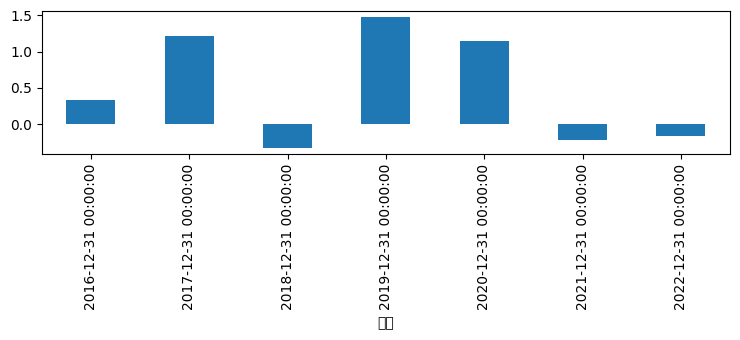

In [121]:
year_ret['000858'].plot(kind='bar')